# Redes Neuronales - Dr. Jorge Velázquez Castro
## Francisco Valentín Valerio López
## Tarea 3: Funciones y Ecuaciones Diferenciales

1. Entrena una red neuronal para que reproduzca las siguientes funciones en el intervalo de [-1,1]. Graficar la solución de la red en conjunto con la gráfica de la función:

a) $3 \sin (\pi x)$

b) $1 + 2x + 4x^3$

### Solución

Aproximar funciones consiste en estimar una función 'desconocida' utilizando las observaciones disponibles del dominio. Las redes neuronales artificiales pueden entrenarse para aprender a aproximar una función.

Este caso se trata de aprendizaje supervisado, ya que debemos tener un conjunto de datos de entradas y salidas, en el que nuestro algoritmo debe aprender a mapear los ejemplos del conjunto de datos. Recordemos que la red neuronal buscará el aproximar la función representada por los datos al calcular el error entre las salidas de predicción y las salidas esperadas y minmizando dicho error durante el proceso de entrenamiento.

Lo que necesitamos entonces para comenzar es un conjunto de datos, que incluya el dominio de la función y los resultados de evaluarla en ese dominio.

Comenzamos con el inciso a), 

$$ y = 3 \sin ( \pi x) $$

Definimos el intervalo $[-1,1]$, y lo dividimos en $n$ puntos, recordemos que mientras más datos tengamos para entrenar, la aproximación de la red será mejor. Sea $n = 1000$, definimos:



In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

x1 = np.linspace(-1, 1, 1000)

def y1(x):
  return 3.0 * np.sin(np.pi * x)

y1 = y1(x1)

Con estas variables `x1` y `y1` podemos formar el conjunto de datos con el que vamos a entrenar la red neuronal. Transformamos las variables para obtener vectores columna.

In [2]:
x1 = x1.reshape(len(x1), 1)
y1 = y1.reshape(len(y1),1)

Después, definimos nuestro modelo utilizando el módulo `Sequential` de Keras.
La estructura de la red será:

- Capa de entrada de 1 neurona
- Dos capas ocultas de 10 neuronas totalmente conectada con función de activación ReLU
- Una capa de salida de 1 neurona

In [3]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input((1)),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

Se optó por utilizar la función de costo Error Cuadrático Medio (MSE) y como optimizador el Stochastic Gradient Descent.

In [4]:
model_1.compile(loss = 'mse', optimizer = 'SGD')

Observamos la estructura de la red que tiene 141 parámetros entrenables.

In [5]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo con 250 epochs, un batchsize de 25 datos y pedimos que nos muestre el proceso de entrenamiento.

In [6]:
model_1.fit(x1, y1, epochs = 250, batch_size = 25, verbose = 1)

Epoch 1/250
40/40 [==============================] - 0s 758us/step - loss: 3.9447
Epoch 2/250
40/40 [==============================] - 0s 767us/step - loss: 2.0557
Epoch 3/250
40/40 [==============================] - 0s 831us/step - loss: 0.9031
Epoch 4/250
40/40 [==============================] - 0s 793us/step - loss: 0.7969
Epoch 5/250
40/40 [==============================] - 0s 818us/step - loss: 0.7735
Epoch 6/250
40/40 [==============================] - 0s 799us/step - loss: 0.7492
Epoch 7/250
40/40 [==============================] - 0s 793us/step - loss: 0.7291
Epoch 8/250
40/40 [==============================] - 0s 716us/step - loss: 0.7027
Epoch 9/250
40/40 [==============================] - 0s 780us/step - loss: 0.6756
Epoch 10/250
40/40 [==============================] - 0s 767us/step - loss: 0.6507
Epoch 11/250
40/40 [==============================] - 0s 742us/step - loss: 0.6225
Epoch 12/250
40/40 [==============================] - 0s 738us/step - loss: 0.5968
Epoch 13/250


Implementamos el modelo entrenado y obtenemos las predicciones aplicadas sobre el dominio.

In [7]:
y1_hat = model_1.predict(x1)

32/32 [==============================] - 0s 646us/step


Finalmente, graficamos la función original y la aproximación obtenida por la red neuronal.

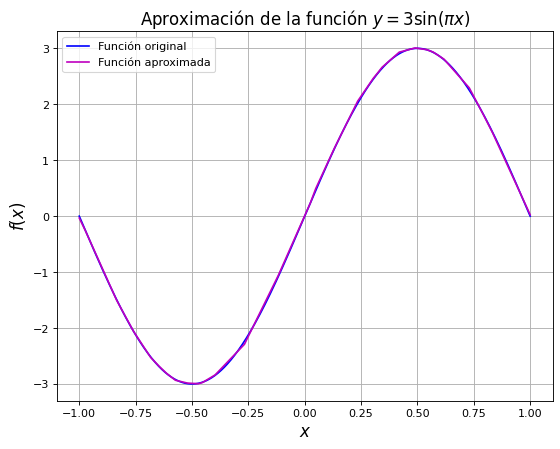

In [8]:
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(x1, y1, 'b', lw = 1.5, label = 'Función original')
plt.plot(x1, y1_hat, 'm', lw = 1.5, label = 'Función aproximada')
plt.legend()
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$f(x)$', fontsize = 15)
plt.title(r'Aproximación de la función $y = 3 \sin (\pi x)$', fontsize = 15)
plt.grid()
plt.show()

Para el inciso b), es el mismo procedimiento pero ahora consideraremos la función

$$y = 1 + 2x + 4x^3 \qquad \text{en} \qquad [-1,1]$$

In [9]:
x2 = np.linspace(-1,1,1000)

def y2(x):
  return 1 + 2*x + 4*x**3

y2 = y2(x2)

x2 = x2.reshape(len(x2), 1)
y2 = y2.reshape(len(y2), 1)

In [10]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input((1)),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [11]:
model_2.compile(loss = 'mse', optimizer = 'SGD')

In [12]:
model_2.fit(x2, y2, epochs = 250, batch_size = 25, verbose = 1)

Epoch 1/250
40/40 [==============================] - 0s 704us/step - loss: 6.7010
Epoch 2/250
40/40 [==============================] - 0s 665us/step - loss: 2.8385
Epoch 3/250
40/40 [==============================] - 0s 716us/step - loss: 0.9202
Epoch 4/250
40/40 [==============================] - 0s 704us/step - loss: 0.5942
Epoch 5/250
40/40 [==============================] - 0s 690us/step - loss: 0.5327
Epoch 6/250
40/40 [==============================] - 0s 716us/step - loss: 0.4291
Epoch 7/250
40/40 [==============================] - 0s 742us/step - loss: 0.3429
Epoch 8/250
40/40 [==============================] - 0s 755us/step - loss: 0.3161
Epoch 9/250
40/40 [==============================] - 0s 742us/step - loss: 0.2874
Epoch 10/250
40/40 [==============================] - 0s 742us/step - loss: 0.3149
Epoch 11/250
40/40 [==============================] - 0s 1ms/step - loss: 0.2074
Epoch 12/250
40/40 [==============================] - 0s 1ms/step - loss: 0.2223
Epoch 13/250
40/4

In [13]:
y2_hat = model_2.predict(x2)

32/32 [==============================] - 0s 611us/step


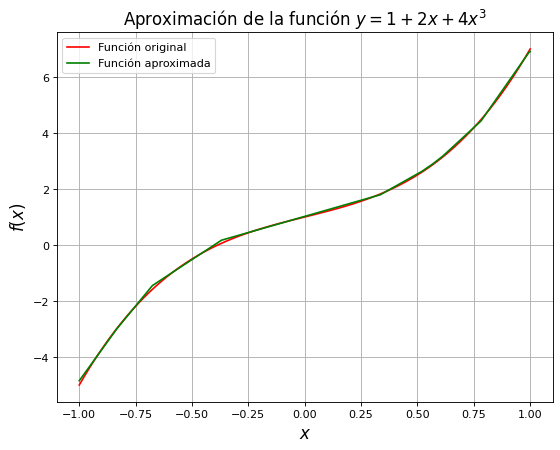

In [14]:
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(x2, y2, 'r', lw = 1.5, label = 'Función original')
plt.plot(x1, y2_hat, 'g', lw = 1.5, label = 'Función aproximada')
plt.legend()
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$f(x)$', fontsize = 15)
plt.title(r'Aproximación de la función $y = 1 + 2x + 4x^3$', fontsize = 15)
plt.grid()
plt.show()

2. Entrenar una red neuronal que dé la solución de las siguientes ecuaciones diferenciales en el intervalo $[-5,5]$. Graficar la solución numérica junto con la solución analítica.

a) $xy' + y = x^2 \cos x$ con $y(0) = 0$.

b) $\frac{d^2 y}{dx^2} = - y$    con  $y(0) = 1$,  $y'(0) = -0.5$

### Solución

Es posible utilizar una red neuronal para resolver ecuaciones diferenciales ordinarias. Supongamos que tenemos una ecuación diferencial de la forma

$$ y'(x) = f(x,y) $$ 

en cierto dominio $D \subset \mathbb{R}$ y con condición inicial $y(x_0) = y_0$. Una red neuronal puede aproximar una función que sea la solución de esta ecuación, es decir:

$$ \text{RNA}(x) \approx y(x) $$

Y por lo tanto, si la red neuronal es cercana a la solución verdadera $y(x)$, su derivada también será cercana a $y'(x)$. Esa condición puede considerarse la función de costo de la red que debemos minimizar.

$$ C = \sqrt{\sum_i \left(  \frac{d}{dx} \text{RNA}(x) - f(x,y) \right)^2} $$

Sin embargo, para dar solución al problema en particular y no a una familia de soluciones, se debe tomar en cuenta la condición inicial o de frontera, según sea el caso, así que la añadimos a la función de costo

$$ C = \sqrt{\sum_i \left(  \frac{d}{dx} \text{RNA}(x) - f(x,y) \right)^2}  + \sqrt{\sum_i \left(  \frac{d}{dx} \text{RNA}(x) - y(x_0) \right)^2} $$

Con ello aseguramos que estamos obteniendo la solución a la ecuación diferencial con las condiciones específicas.

En la parte técnica, se puede implementar un algoritmo que utilice el método `tf.GradientTape` para diferenciación automática, ya que requerimos obtener derivadas respecto a un parámetro $x$ adicional a las derivadas respecto a los pesos. Para ello, podemos modificar la clase `tf.Sequential` para incluir en método de Gradient Tape y poder derivar respecto al parámetro $x$.

In [15]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

class ODEsolver(Sequential):
	"""docstring for ODEsolver"""
	def __init__(self, **kwargs):
		super().__init__(**kwargs)
		self.loss_tracker = keras.metrics.Mean(name = "loss")

	@property
	def metrics(self):
		return [self.loss_tracker]

	def train_step(self, data):
		batch_size = tf.shape(data)[0]
		x = tf.random.uniform((batch_size, 1), minval = -5, maxval = 5)

		with tf.GradientTape() as tape:
			tape.watch(x) # Añadí esta linea
			with tf.GradientTape() as tape2:
				tape2.watch(x)
				y_pred = self(x, training = True)
			dy = tape2.gradient(y_pred, x)
			x_o = tf.zeros((batch_size, 1))
			y_o = self(x_o, training = True)
			eq = x*dy + y_pred - x**2 * tf.math.cos(x)
			ic = y_o
			loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0.,ic)

		grads = tape.gradient(loss, self.trainable_variables)
		self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

		self.loss_tracker.update_state(loss)

		return {"loss": self.loss_tracker.result()}

Llamamos a la clase modificada `ODEsolver` y construimos la red neuronal. En este caso, se eligió una arquitectura de 1 capa de entrada densa de 10 neuronas, 3 capas densas ocultas con 10 neuronas cada una con función de activación tangente hiperbólica y una capa de salida de 1 neurona con función de activación lineal.

In [16]:
model = ODEsolver()

model.add(Dense(10, activation = 'tanh', input_shape=(1,)))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(1, activation = 'linear'))

In [17]:
model.summary()

Model: "od_esolver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


Compilamos el modelo, utilizando el optimizador `RMSprop` y pedimos que nos de el valor de la función de costo.

In [18]:
model.compile(optimizer = RMSprop(), metrics = ['loss'])


Definimos el intervalo del dominio con 1000 puntos y entrenamos por 500 épocas.

In [19]:
x = tf.linspace(-5,5,1000)
history = model.fit(x, epochs = 500, verbose = 0)

Finalmente, evaluamos el modelo entrenado y guardamos el resultado en la variable `a`.

In [21]:
x_testv = tf.linspace(-5.0,5.0,1000)
a = model.predict(x_testv)

32/32 [==============================] - 0s 504us/step


Para comparar el resultado obtenido, debemos ver que coincida con la solución analítica a la ecuación diferencial. Notamos que se trata de una ecuación diferencial exacta, de la forma

$$ M(x,y) dx + N(x,y) dy = 0$$

donde se cumple que:

$$ \frac{\partial M}{\partial y} = \frac{\partial N}{\partial x}$$

Resolviendo analíticamente, se tiene que la solución, con $y(0) = 0$, es:

$$ y (x) = \frac{2 x \cos x + (x^2 -2) \sin x}{x} $$

Finalmente, graficamos la solución analítica como la obtenida por la red.

In [22]:
def y1_sol(x):
	return (2*x*tf.math.cos(x) + (x**2 - 2)*tf.math.sin(x)) / (x)

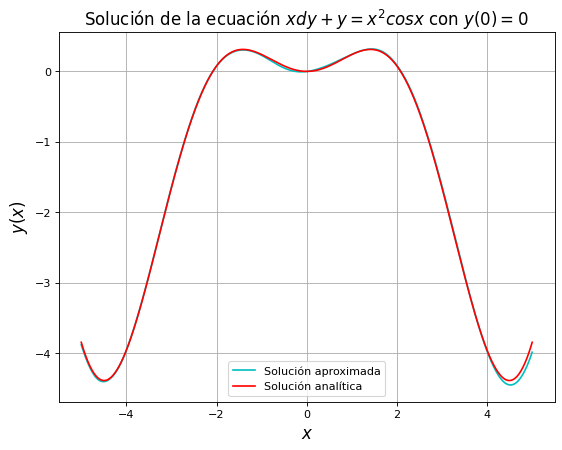

In [23]:
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(x_testv,a, 'c', lw = 1.5, label = 'Solución aproximada')
plt.plot(x_testv, y1_sol(x), 'r', lw = 1.5, label = 'Solución analítica')
plt.title(r'Solución de la ecuación $x dy + y = x^2 cos x$ con $y(0)=0$', fontsize = 15)
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$y(x)$', fontsize = 15)
plt.grid()
plt.legend()
plt.show()

Para el inciso b), debemos hacer algunas modificaciones a la clase `ODEsolver`, ya que tenemos una ecuación diferencial de segundo orden. La idea consiste en anidar los Gradient Tapes, para ir derivando de tal forma de obtener una segunda derivada con respecto a $x$. 

Hay que tener cuidado con los bloques de código, puesto que la indentación puede hacernos pasar una mala jugada, debemos de tomar en cuenta los niveles en los que haremos la primera derivada, con su condición inicial, y la segunda con su condición también.

Por lo demás, el código es idéntico al del inciso a).

In [24]:
class ODEsolver(Sequential):
    def __init__(self, **kwars):
        super().__init__(**kwars)
        self.loss_tracker = keras.metrics.Mean(name = "loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size = tf.shape(data)[0]
        x = tf.random.uniform((batch_size,1), minval= -5, maxval= 5)
        x_0 = tf.zeros((batch_size,1))

        with tf.GradientTape() as tape:
            #Compute the loss value
            with tf.GradientTape(persistent=True) as tape2:
                tape2.watch(x)
                tape2.watch(x_0)

                with tf.GradientTape() as tape3:
                    tape3.watch(x)    
                    y_pred = self(x, training=True)
                y_x = tape3.gradient(y_pred,x)
                y_0 = self(x_0, training=True)

            y_xx = tape2.gradient(y_x, x)
            y_xo = tape2.gradient(y_0,x_0)
            eq = y_xx + y_pred
            ic = y_0 - 1.0 
            ic1 = y_xo + 0.5
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) + keras.losses.mean_squared_error(0., ic1)

        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
        self.loss_tracker.update_state(loss)
         #Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}

In [25]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape = (1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [26]:
model.summary()

Model: "od_esolver_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer=RMSprop(), metrics=["loss"])

Esta ecuación diferencial ordinaria de segundo orden corresponde a una ecuación autónoma, en específico es un oscilador armónico simple.

Con las condiciones iniciales, analíticamente obtenemos que la solución está dada por:

$$y(x) = \cos x - 0.5 \sin x $$

Grafiquemos y comparemos.

Epoch 1/100
32/32 [==============================] - 1s 683us/step - loss: 0.5581
Epoch 2/100
32/32 [==============================] - 0s 504us/step - loss: 0.2923
Epoch 3/100
32/32 [==============================] - 0s 504us/step - loss: 0.2024
Epoch 4/100
32/32 [==============================] - 0s 484us/step - loss: 0.1629
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1360
Epoch 6/100
32/32 [==============================] - 0s 965us/step - loss: 0.1311
Epoch 7/100
32/32 [==============================] - 0s 967us/step - loss: 0.1189
Epoch 8/100
32/32 [==============================] - 0s 901us/step - loss: 0.1216
Epoch 9/100
32/32 [==============================] - 0s 965us/step - loss: 0.1193
Epoch 10/100
32/32 [==============================] - 0s 950us/step - loss: 0.1121
Epoch 11/100
32/32 [==============================] - 0s 933us/step - loss: 0.1078
Epoch 12/100
32/32 [==============================] - 0s 901us/step - loss: 0.1180
Epoch 13/100
32

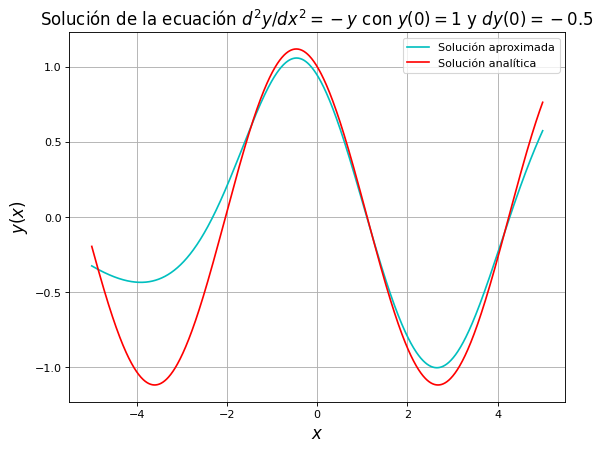

In [28]:
x = tf.linspace(-5,5,1000)
history = model.fit(x,epochs = 100, verbose = 1)

x_testv = tf.linspace(-5,5,1000)
b = model.predict(x_testv)

def y2_sol(x):
    return tf.math.cos(x) - 0.5 * tf.math.sin(x)

plt.figure(figsize = (8,6), dpi = 80)
plt.plot(x_testv,b, 'c', lw = 1.5, label = 'Solución aproximada')
plt.plot(x_testv, y2_sol(x), 'r', lw = 1.5, label = 'Solución analítica')
plt.title(r'Solución de la ecuación $ d^2y/dx^2 = - y$ con $y(0)=1$ y $dy(0) = -0.5$', fontsize = 15)
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$y(x)$', fontsize = 15)
plt.grid()
plt.legend()
plt.show()